### What is Principal Component Analysis?

Principal Component Analysis is a statistical method that transforms high-dimensional data into a lower-dimensional form while preserving the most important information. It accomplishes this by identifying new axes, called principal components, along which the data varies the most. These components are orthogonal to each other, meaning they are uncorrelated, making them a powerful tool for dimensionality reduction.

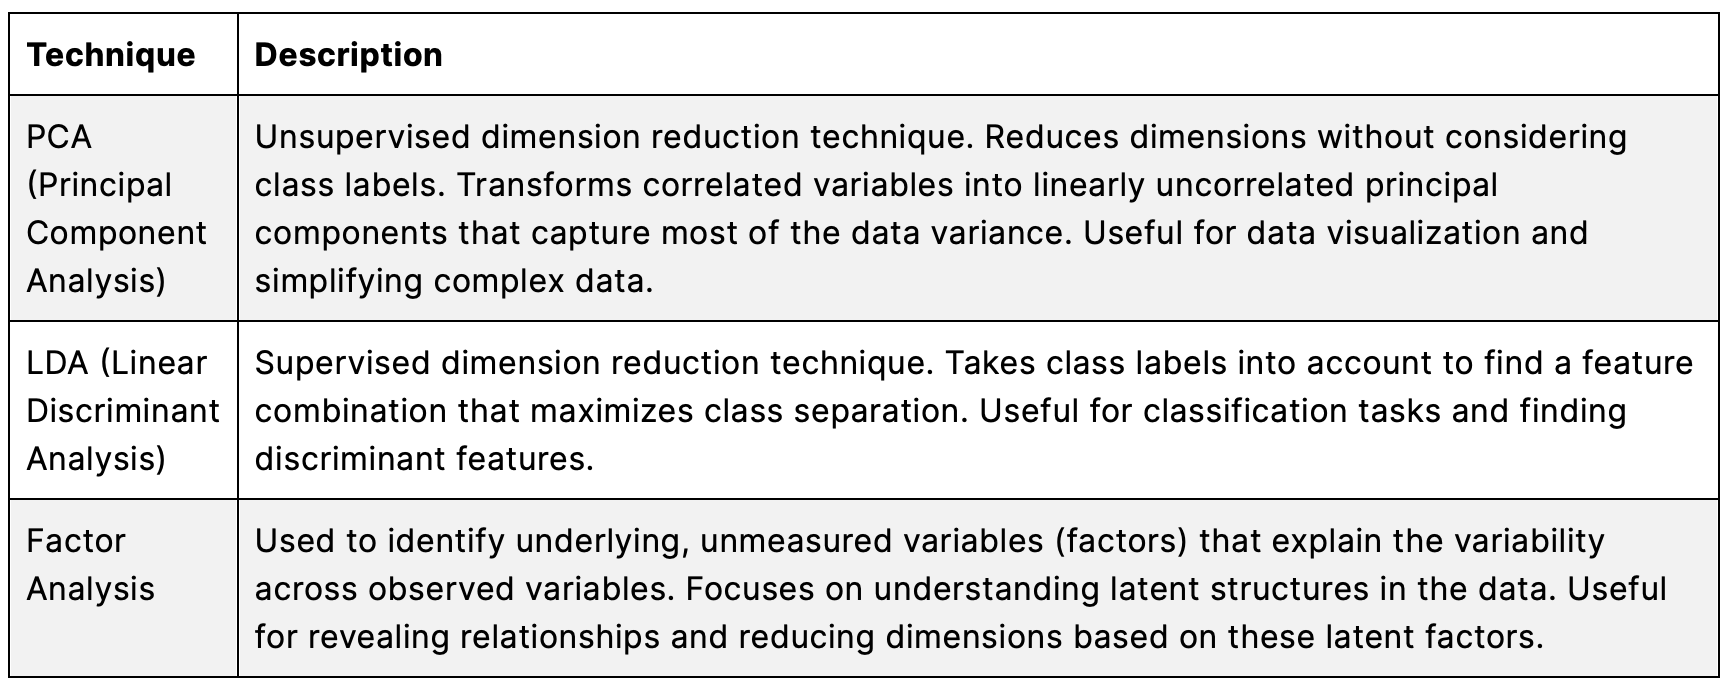

### The Need for Dimensionality Reduction

Imagine you have a dataset with many features or variables. Each feature contributes to the overall complexity of the data, making it challenging to analyze, visualize, or build models. High dimensionality can lead to various problems:

1. Computational Complexity: As the number of features increases, the computational resources and time required for analysis and modeling grow exponentially.

2. Overfitting: Models can become overly complex and fit the noise in the data, leading to poor generalization on new, unseen data.

3. Difficulty in Visualization: It becomes challenging to visualize and understand data in more than three dimensions.

4. Redundancy: Some features may be highly correlated, meaning they convey similar information. This redundancy can be eliminated without significant loss of information.

This is where PCA comes into play. It helps us reduce the dimensionality of the data while preserving its essential characteristics.

### How Principal Component Analysis (PCA) Work ?

PCA begins with a set of data points, typically represented as a matrix, where rows represent observations, and columns represent features.

#### Step 1: Data Standardization

Before performing PCA, it’s essential to standardize the data. This means centering the data by subtracting the mean and scaling it by dividing by the standard deviation. Standardization ensures that all features have equal importance in the analysis.

#### Step 2: Covariance Matrix

Calculate the covariance matrix for the standardized dataset.
PCA hinges on the computation of the covariance matrix. The covariance between two variables measures how they change together. The covariance matrix for a dataset with n features is an n x n matrix that summarizes the relationships between all pairs of features.

#### Step 3: Eigenvalue and Eigenvector Calculation

Find the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions of maximum variance, and the corresponding eigenvalues indicate the magnitude of variance along those directions.

#### Step 4: Sorting Eigenvalues and Eigenvectors

To identify the most significant principal components, sort the eigenvalues in descending order. The corresponding eigenvectors are also sorted accordingly. The first principal component explains the most variance, the second explains the second most, and so on.

#### Step 5: Selecting Principal Components

Select the top k eigenvectors (principal components) where k is the desired dimensionality of the reduced dataset.

#### Step 6: Transform the Data

Multiply the original standardized data by the selected principal components to obtain the new, lower-dimensional representation of the data.

### Why is Normalization of Variables Necessary in Principal Component Analysis (PCA)?

The principal components are supplied with a normalized version of the original predictors. This is because the original predictors may have different scales. For example: Imagine a data set with variables measuring units as gallons, kilometers, light years, etc. The scale of variances in these variables will obviously be large.

Performing PCA on un-normalized variables will lead to exponentially large loadings for variables with high variance. In turn, this will lead to the dependence of a principal component on the variable with high variance. This is undesirable.

### Applications of PCA

1. Image Compression: Reducing the dimensionality of image data while preserving essential information, which is crucial for image storage and transmission.
2. Bioinformatics: Analyzing high-dimensional gene expression data to identify patterns and reduce noise.
3. Face Recognition: Extracting essential facial features for recognition tasks.
4. Recommendation Systems: Reducing the dimensionality of user-item interaction data for efficient recommendation algorithms.
5. Finance: Analyzing financial data to identify underlying trends and patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to the categorical columns
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['day'] = le.fit_transform(data['day'])
data['time'] = le.fit_transform(data['time'])

print(data)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    2     0     2
1         10.34  1.66    1       0    2     0     3
2         21.01  3.50    1       0    2     0     3
3         23.68  3.31    1       0    2     0     2
4         24.59  3.61    0       0    2     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    3     0     2

[244 rows x 7 columns]


In [4]:
x=data.drop(columns='tip')
y=data.tip

In [5]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [6]:
pca=PCA()
pca.fit_transform(x_scaled)

array([[-0.64825187, -0.391193  , -0.14701599, -1.45843528,  0.58118349,
        -0.53326811],
       [-0.03672532,  0.02257671, -1.40831566, -0.05840716, -0.80855313,
        -0.57268766],
       [ 0.48424518,  0.62075703, -1.06174552,  0.00339783, -0.01338455,
        -0.33397486],
       ...,
       [ 1.16976895, -1.08075629,  0.39103161,  0.94435273,  0.30179418,
        -0.02892948],
       [ 0.53387373, -0.69995435, -1.26215372, -0.09473659,  0.28306973,
         0.38954687],
       [-1.10713763,  0.20332829, -0.10652371, -1.20058864,  0.90726214,
        -1.21961039]])

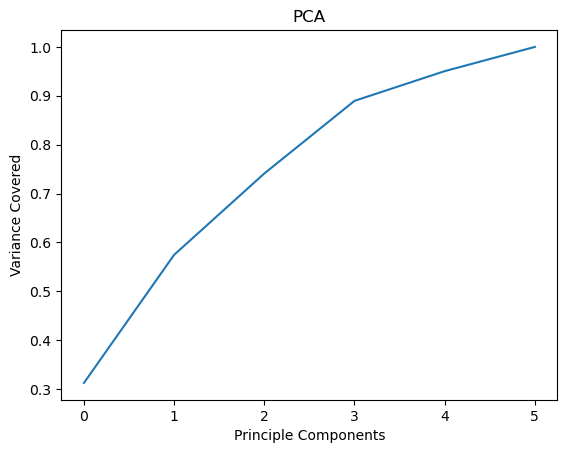

In [7]:
#Lets plot scree plot to check the best components.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [8]:
#Lets select how many Pricipal components we want
pca=PCA(n_components=6)
new_pump=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pump,
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [9]:
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.648252,-0.391193,-0.147016,-1.458435,0.581183,-0.533268
1,-0.036725,0.022577,-1.408316,-0.058407,-0.808553,-0.572688
2,0.484245,0.620757,-1.061746,0.003398,-0.013385,-0.333975
3,0.273709,0.122739,-1.089465,0.186685,0.912460,-0.205740
4,0.404626,1.330284,0.328724,-1.750056,-0.306168,-0.500240
...,...,...,...,...,...,...
239,1.422111,0.576203,-0.783601,-0.197625,0.391615,0.571840
240,0.794657,-0.966795,1.697265,-0.635893,0.805184,-0.105887
241,1.169769,-1.080756,0.391032,0.944353,0.301794,-0.028929
242,0.533874,-0.699954,-1.262154,-0.094737,0.283070,0.389547
